# **Institut Teknologi PLN | Preprocessing & EDA**

## **Data Cleaning & Preprocessing**

### Import libraries

In [33]:
import pandas as pd
import string
import re
import ast
import numpy as np
import nltk
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [34]:
df = pd.read_csv('../../dataset/labeled_data/ItPLN_labelled.csv')

print(df.shape)
print(df.info())
df.head()


(188, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   page            188 non-null    int64  
 1   name            188 non-null    object 
 2   link            188 non-null    object 
 3   thumbnail       188 non-null    object 
 4   rating          188 non-null    float64
 5   date            188 non-null    object 
 6   snippet         184 non-null    object 
 7   images          188 non-null    object 
 8   local_guide     188 non-null    bool   
 9   label_sentimen  184 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 13.5+ KB
None


,page,name,link,thumbnail,rating,date,snippet,images,local_guide,label_sentimen
0,1,Nindyo Yuwono,https://www.google.com/maps/contrib/1156914442...,https://lh3.googleusercontent.com/a/ACg8ocKNMV...,4.0,9 bulan lalu,Kampus para mahasiswa teknik menimba ilmu tapi...,['https://lh5.googleusercontent.com/p/AF1QipMn...,True,positif
1,1,Muhammad Fanani Hafifudin,https://www.google.com/maps/contrib/1165695556...,https://lh3.googleusercontent.com/a-/ALV-UjVwD...,2.0,4 bulan lalu,"Untuk sekarang kampus udah bagus, banyak fasil...",[],False,negatif
2,1,Hafizh Hilman Asyhari,https://www.google.com/maps/contrib/1074700990...,https://lh3.googleusercontent.com/a-/ALV-UjUA6...,5.0,4 bulan lalu,Sangat cocok untuk abis SMA belajar teknik kel...,[],True,positif
3,1,The Scrivener's Presenter Global,https://www.google.com/maps/contrib/1140684797...,https://lh3.googleusercontent.com/a/ACg8ocJzWU...,5.0,10 bulan lalu,Ruang kelas bagus. Ada fasilitas yg mumpuni\n\...,['https://lh5.googleusercontent.com/p/AF1QipO3...,True,positif
4,1,MUHAMMAD RIZKY,https://www.google.com/maps/contrib/1028538460...,https://lh3.googleusercontent.com/a-/ALV-UjUgq...,5.0,5 tahun lalu,Kampus kesayangan. Mudah dijangkau karna terli...,['https://lh5.googleusercontent.com/p/AF1QipPl...,True,positif


In [35]:
df['rating'].describe()

count    188.000000
mean       4.468085
std        1.158111
min        1.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64

### Hapus kolom yang tidak diperlukan

In [36]:
df.columns

Index(['page', 'name', 'link', 'thumbnail', 'rating', 'date', 'snippet',
       'images', 'local_guide', 'label_sentimen'],
      dtype='object')

In [37]:
# drop the columns
df = df.drop(columns=['page', 'name', 'link', 'thumbnail', 'date', 'images', 'local_guide'], axis=1)
df.head(10)

,rating,snippet,label_sentimen
0,4.0,Kampus para mahasiswa teknik menimba ilmu tapi...,positif
1,2.0,"Untuk sekarang kampus udah bagus, banyak fasil...",negatif
2,5.0,Sangat cocok untuk abis SMA belajar teknik kel...,positif
3,5.0,Ruang kelas bagus. Ada fasilitas yg mumpuni\n\...,positif
4,5.0,Kampus kesayangan. Mudah dijangkau karna terli...,positif
5,2.0,Apakah benar klo lulusan itpln gampang cari ke...,netral
6,1.0,UKT ELIT ANJUNGAN SULIT.\n1. perubahan passwor...,negatif
7,1.0,"ANAK2 KULIAH DISINI RATA2 GK PUNYA ATTITUDE, T...",negatif
8,5.0,"Lokasi mudah dijangkau, mahasiswa dari Sabang...",positif
9,5.0,Kampus kecil yang menjadikan mahasiswa menjadi...,positif


### Convert to lowercase

In [38]:
df['snippet'] = df['snippet'].str.lower()
df.head()

,rating,snippet,label_sentimen
0,4.0,kampus para mahasiswa teknik menimba ilmu tapi...,positif
1,2.0,"untuk sekarang kampus udah bagus, banyak fasil...",negatif
2,5.0,sangat cocok untuk abis sma belajar teknik kel...,positif
3,5.0,ruang kelas bagus. ada fasilitas yg mumpuni\n\...,positif
4,5.0,kampus kesayangan. mudah dijangkau karna terli...,positif


### Hapus Missing Values

In [39]:
df.shape

(188, 3)

In [40]:
df.isnull().sum()

rating            0
snippet           4
label_sentimen    4
dtype: int64

In [41]:
df = df.dropna()
df.head()

,rating,snippet,label_sentimen
0,4.0,kampus para mahasiswa teknik menimba ilmu tapi...,positif
1,2.0,"untuk sekarang kampus udah bagus, banyak fasil...",negatif
2,5.0,sangat cocok untuk abis sma belajar teknik kel...,positif
3,5.0,ruang kelas bagus. ada fasilitas yg mumpuni\n\...,positif
4,5.0,kampus kesayangan. mudah dijangkau karna terli...,positif


In [42]:
df.isnull().sum()

rating            0
snippet           0
label_sentimen    0
dtype: int64

In [43]:
df.shape

(184, 3)

### Menghapus Whitespace

In [44]:
def remove_extra_whitespace(text):
    # Menghapus spasi di awal dan akhir teks
    text = text.strip()
    # Menghapus spasi berlebih di tengah teks
    text = re.sub('\s+', ' ', text)
    return text

df['snippet'] = df['snippet'].apply(remove_extra_whitespace)

In [45]:
df.head()

,rating,snippet,label_sentimen
0,4.0,kampus para mahasiswa teknik menimba ilmu tapi...,positif
1,2.0,"untuk sekarang kampus udah bagus, banyak fasil...",negatif
2,5.0,sangat cocok untuk abis sma belajar teknik kel...,positif
3,5.0,ruang kelas bagus. ada fasilitas yg mumpuni ju...,positif
4,5.0,kampus kesayangan. mudah dijangkau karna terli...,positif


### Hapus Punctuation

In [46]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
def remove_punctuations(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('', '', punctuations))

df['snippet'] = df['snippet'].apply(remove_punctuations)

In [48]:
df.head()

,rating,snippet,label_sentimen
0,4.0,kampus para mahasiswa teknik menimba ilmu tapi...,positif
1,2.0,untuk sekarang kampus udah bagus banyak fasili...,negatif
2,5.0,sangat cocok untuk abis sma belajar teknik kel...,positif
3,5.0,ruang kelas bagus ada fasilitas yg mumpuni jug...,positif
4,5.0,kampus kesayangan mudah dijangkau karna terlih...,positif


### Visualisasi sebelum preprocessing

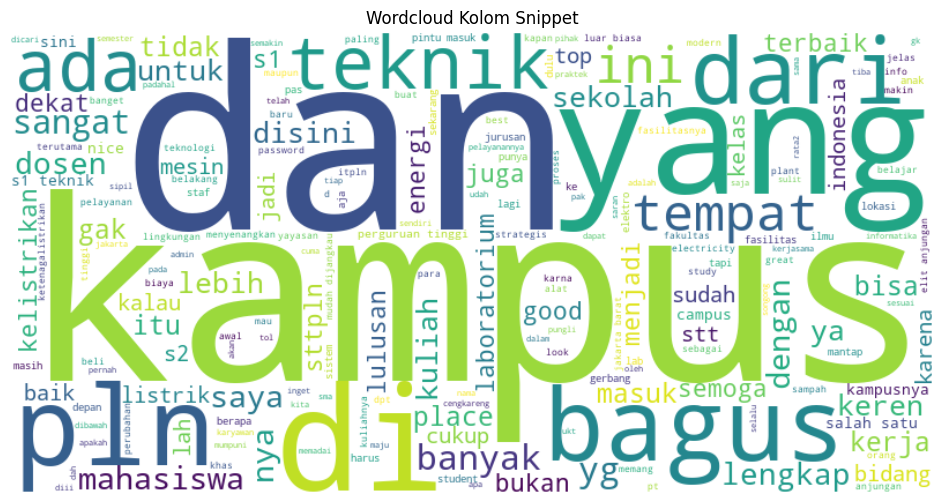

In [49]:
# Gabungkan semua teks dari kolom 'snippet' yang tidak null
text = " ".join(df['snippet'].dropna())

# Buat dan tampilkan wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Kolom Snippet')
plt.show()

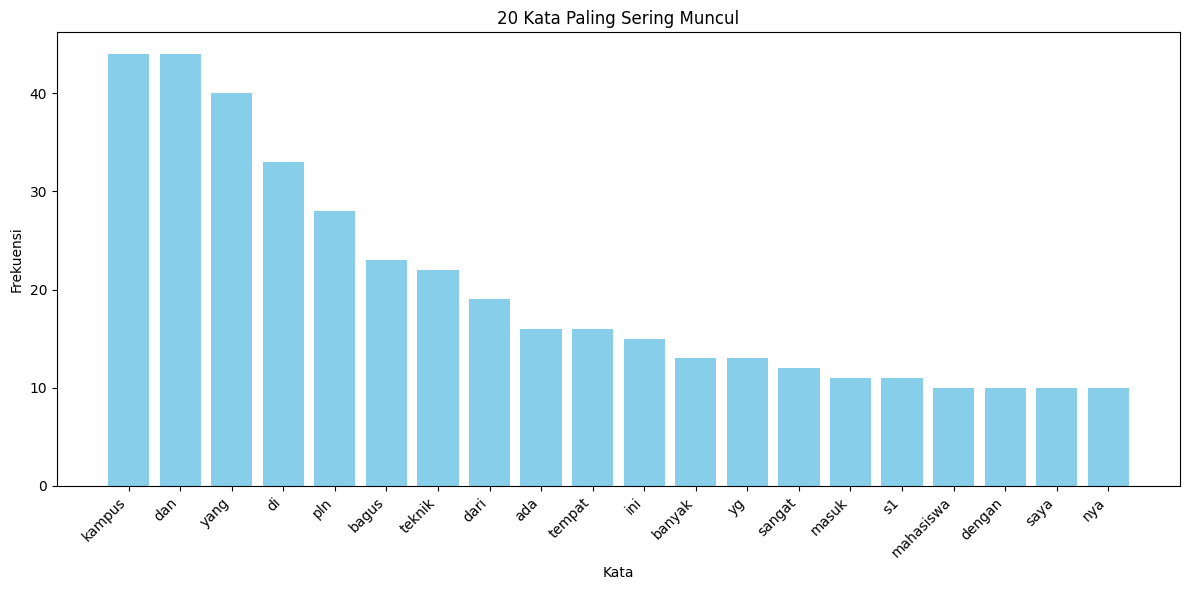

In [50]:
from collections import Counter

# Tokenisasi dan hitung frekuensi kata
words = text.split()
word_freq = Counter(words)

# Ambil 20 kata paling sering muncul
most_common = word_freq.most_common(20)
words_plot, counts_plot = zip(*most_common)

plt.figure(figsize=(12,6))
plt.bar(words_plot, counts_plot, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('20 Kata Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### Hapus special characters / emot

In [51]:
df.head()

,rating,snippet,label_sentimen
0,4.0,kampus para mahasiswa teknik menimba ilmu tapi...,positif
1,2.0,untuk sekarang kampus udah bagus banyak fasili...,negatif
2,5.0,sangat cocok untuk abis sma belajar teknik kel...,positif
3,5.0,ruang kelas bagus ada fasilitas yg mumpuni jug...,positif
4,5.0,kampus kesayangan mudah dijangkau karna terlih...,positif


In [52]:
def remove_spl_chars(text):
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

df['snippet'] = df['snippet'].apply(remove_spl_chars)

In [53]:
df.head(10)

,rating,snippet,label_sentimen
0,4.0,kampus para mahasiswa teknik menimba ilmu tapi...,positif
1,2.0,untuk sekarang kampus udah bagus banyak fasili...,negatif
2,5.0,sangat cocok untuk abis sma belajar teknik kel...,positif
3,5.0,ruang kelas bagus ada fasilitas yg mumpuni jug...,positif
4,5.0,kampus kesayangan mudah dijangkau karna terlih...,positif
5,2.0,apakah benar klo lulusan itpln gampang cari ke...,netral
6,1.0,ukt elit anjungan sulit 1 perubahan password h...,negatif
7,1.0,anak2 kuliah disini rata2 gk punya attitude ti...,negatif
8,5.0,lokasi mudah dijangkau mahasiswa dari sabang s...,positif
9,5.0,kampus kecil yang menjadikan mahasiswa menjadi...,positif


### Normalisasi

In [54]:
# Load kamus slang
with open('kamus_slang.json', encoding='utf-8') as f:
    slang_dict = ast.literal_eval(f.read())

# Fungsi untuk mengganti kata slang dengan kata yang sudah dinormalisasi
def normalize_text(text):
    words = text.split()
    normalized_words = [slang_dict.get(word, word) for word in words]
    return " ".join(normalized_words)

# Menerapkan normalisasi pada kolom snippet
df['snippet'] = df['snippet'].apply(lambda x: normalize_text(x))
df.head(10)
    

,rating,snippet,label_sentimen
0,4.0,kampus para mahasiswa teknik menimba ilmu tapi...,positif
1,2.0,untuk sekarang kampus sudah bagus banyak fasil...,negatif
2,5.0,sangat cocok untuk habis sama belajar teknik k...,positif
3,5.0,ruang kelas bagus ada fasilitas yang mumpuni j...,positif
4,5.0,kampus kesayangan mudah dijangkau karena terli...,positif
5,2.0,apakah benar kalau lulusan itpln gampang cari ...,netral
6,1.0,ukt elit anjungan sulit 1 perubahan password h...,negatif
7,1.0,anak-anak kuliah disini rata-rata tidak punya ...,negatif
8,5.0,lokasi mudah dijangkau mahasiswa dari sabang s...,positif
9,5.0,kampus kecil yang menjadikan mahasiswa menjadi...,positif


### Tokenisasi

In [55]:
def tokenize_text(text):
    # Tokenisasi teks
    tokens = text.split()
    # Mengembalikan daftar token
    return tokens

df['tokens'] = df['snippet'].apply(tokenize_text)

df.head(10)

,rating,snippet,label_sentimen,tokens
0,4.0,kampus para mahasiswa teknik menimba ilmu tapi...,positif,"[kampus, para, mahasiswa, teknik, menimba, ilm..."
1,2.0,untuk sekarang kampus sudah bagus banyak fasil...,negatif,"[untuk, sekarang, kampus, sudah, bagus, banyak..."
2,5.0,sangat cocok untuk habis sama belajar teknik k...,positif,"[sangat, cocok, untuk, habis, sama, belajar, t..."
3,5.0,ruang kelas bagus ada fasilitas yang mumpuni j...,positif,"[ruang, kelas, bagus, ada, fasilitas, yang, mu..."
4,5.0,kampus kesayangan mudah dijangkau karena terli...,positif,"[kampus, kesayangan, mudah, dijangkau, karena,..."
5,2.0,apakah benar kalau lulusan itpln gampang cari ...,netral,"[apakah, benar, kalau, lulusan, itpln, gampang..."
6,1.0,ukt elit anjungan sulit 1 perubahan password h...,negatif,"[ukt, elit, anjungan, sulit, 1, perubahan, pas..."
7,1.0,anak-anak kuliah disini rata-rata tidak punya ...,negatif,"[anak-anak, kuliah, disini, rata-rata, tidak, ..."
8,5.0,lokasi mudah dijangkau mahasiswa dari sabang s...,positif,"[lokasi, mudah, dijangkau, mahasiswa, dari, sa..."
9,5.0,kampus kecil yang menjadikan mahasiswa menjadi...,positif,"[kampus, kecil, yang, menjadikan, mahasiswa, m..."


### Stopwords Removal

In [56]:
from nltk.corpus import stopwords
# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)
df.head(10)


,rating,snippet,label_sentimen,tokens
0,4.0,kampus para mahasiswa teknik menimba ilmu tapi...,positif,"[kampus, mahasiswa, teknik, menimba, ilmu, fak..."
1,2.0,untuk sekarang kampus sudah bagus banyak fasil...,negatif,"[kampus, bagus, fasilitas, memadai, alangkah, ..."
2,5.0,sangat cocok untuk habis sama belajar teknik k...,positif,"[cocok, habis, belajar, teknik, kelistrikan, f..."
3,5.0,ruang kelas bagus ada fasilitas yang mumpuni j...,positif,"[ruang, kelas, bagus, fasilitas, mumpuni, juru..."
4,5.0,kampus kesayangan mudah dijangkau karena terli...,positif,"[kampus, kesayangan, mudah, dijangkau, tol, ja..."
5,2.0,apakah benar kalau lulusan itpln gampang cari ...,netral,"[lulusan, itpln, gampang, cari, kerja, dicari,..."
6,1.0,ukt elit anjungan sulit 1 perubahan password h...,negatif,"[ukt, elit, anjungan, sulit, 1, perubahan, pas..."
7,1.0,anak-anak kuliah disini rata-rata tidak punya ...,negatif,"[anak-anak, kuliah, rata-rata, attitude, malam..."
8,5.0,lokasi mudah dijangkau mahasiswa dari sabang s...,positif,"[lokasi, mudah, dijangkau, mahasiswa, sabang, ..."
9,5.0,kampus kecil yang menjadikan mahasiswa menjadi...,positif,"[kampus, menjadikan, mahasiswa, orang, orang, ..."


### Stemming dengan Sastrawi


In [58]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['tokens'] = df['tokens'].apply(stem_text)
df.head(10)

,rating,snippet,label_sentimen,tokens
0,4.0,kampus para mahasiswa teknik menimba ilmu tapi...,positif,"[kampus, mahasiswa, teknik, timba, ilmu, fakul..."
1,2.0,untuk sekarang kampus sudah bagus banyak fasil...,negatif,"[kampus, bagus, fasilitas, pada, alangkah, bai..."
2,5.0,sangat cocok untuk habis sama belajar teknik k...,positif,"[cocok, habis, ajar, teknik, listrik, fakultas..."
3,5.0,ruang kelas bagus ada fasilitas yang mumpuni j...,positif,"[ruang, kelas, bagus, fasilitas, mumpuni, juru..."
4,5.0,kampus kesayangan mudah dijangkau karena terli...,positif,"[kampus, sayang, mudah, jangkau, tol, jalan, m..."
5,2.0,apakah benar kalau lulusan itpln gampang cari ...,netral,"[lulus, itpln, gampang, cari, kerja, cari, kam..."
6,1.0,ukt elit anjungan sulit 1 perubahan password h...,negatif,"[ukt, elit, anjung, sulit, 1, ubah, password, ..."
7,1.0,anak-anak kuliah disini rata-rata tidak punya ...,negatif,"[anak, kuliah, rata, attitude, malam, kumpul, ..."
8,5.0,lokasi mudah dijangkau mahasiswa dari sabang s...,positif,"[lokasi, mudah, jangkau, mahasiswa, sabang, me..."
9,5.0,kampus kecil yang menjadikan mahasiswa menjadi...,positif,"[kampus, jadi, mahasiswa, orang, orang, hebat,..."


### Visualisasi setelah preprocessing

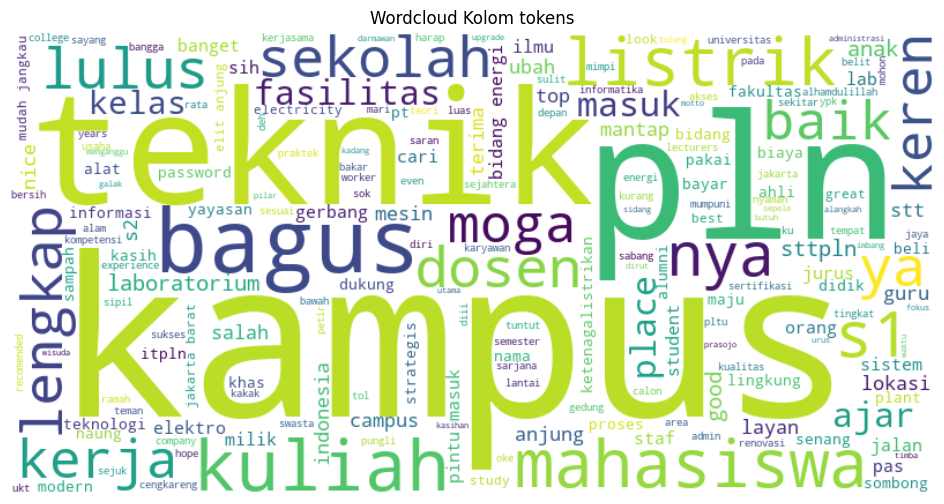

In [59]:
# Gabungkan semua token dari kolom 'tokens' yang tidak null menjadi satu string
all_tokens = [token for tokens in df['tokens'].dropna() for token in tokens]
text = " ".join(all_tokens)

# Buat dan tampilkan wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Kolom tokens')
plt.show()

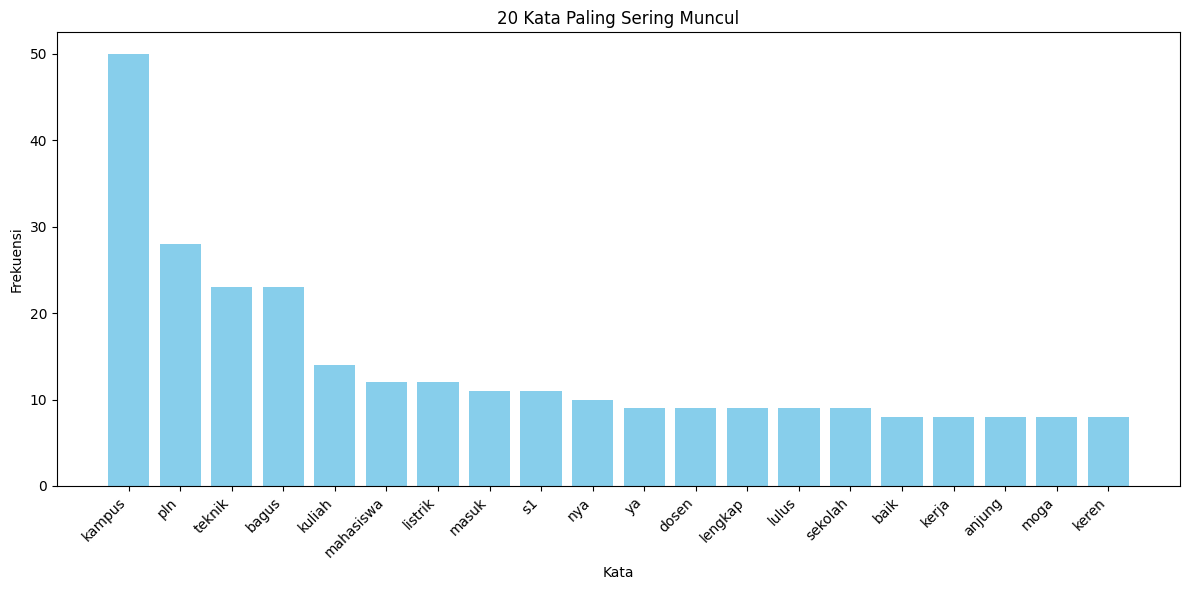

In [60]:
from collections import Counter

# Tokenisasi dan hitung frekuensi kata
words = text.split()
word_freq = Counter(words)

# Ambil 20 kata paling sering muncul
most_common = word_freq.most_common(20)
words_plot, counts_plot = zip(*most_common)

plt.figure(figsize=(12,6))
plt.bar(words_plot, counts_plot, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('20 Kata Paling Sering Muncul')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

### Simpan dataset bersih


In [61]:
output_path = '../../dataset/cleaned_dataset/ItPLN_labelled_cleaned.csv'

try:
	# Save the dataframe to a CSV file
	df.to_csv(output_path, index=False)
	print(f"DataFrame successfully saved to {output_path}")
except Exception as e:
	print(f"An error occurred: {e}")

DataFrame successfully saved to ../../dataset/cleaned_dataset/ItPLN_labelled_cleaned.csv


## **Exploratory Data Analysis (EDA)**

In [62]:
df['rating'].unique()

array([4., 2., 5., 1., 3.])

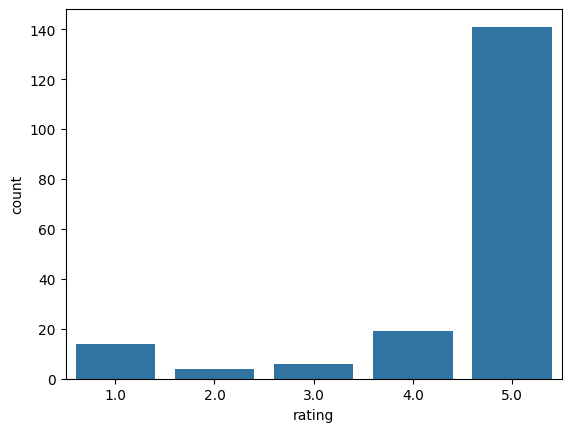

rating
5.0    141
4.0     19
1.0     14
3.0      6
2.0      4
Name: count, dtype: int64


In [63]:
sns.countplot(x=df['rating'])
plt.show()
print(df['rating'].value_counts())

In [64]:
df['label_sentimen'].unique()

array(['positif', 'negatif', 'netral'], dtype=object)

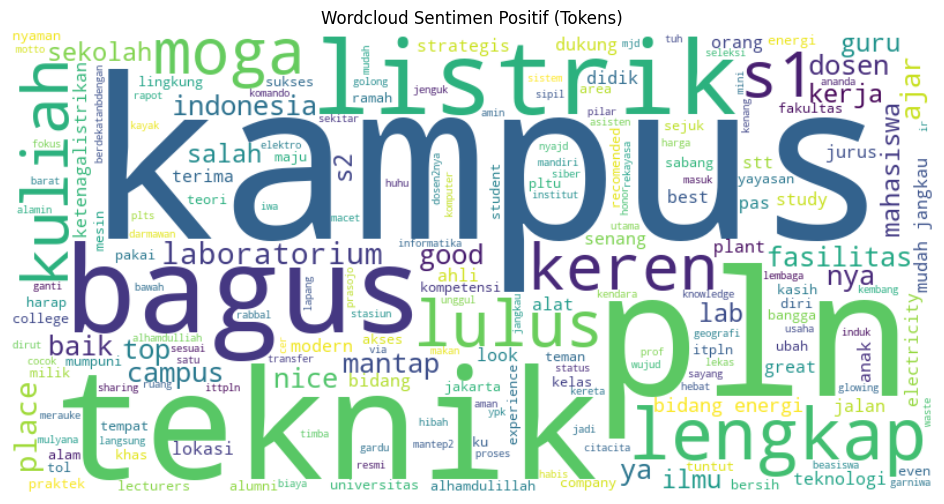

In [65]:
# Visualisasi Wordcloud untuk sentimen positif pada kolom tokens
tokens_positif = df[df['label_sentimen'] == 'positif']['tokens'].dropna()
text_tokens_positif = " ".join([token for tokens in tokens_positif for token in tokens])
wordcloud_tokens_positif = WordCloud(width=800, height=400, background_color='white').generate(text_tokens_positif)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tokens_positif, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Sentimen Positif (Tokens)')
plt.show()

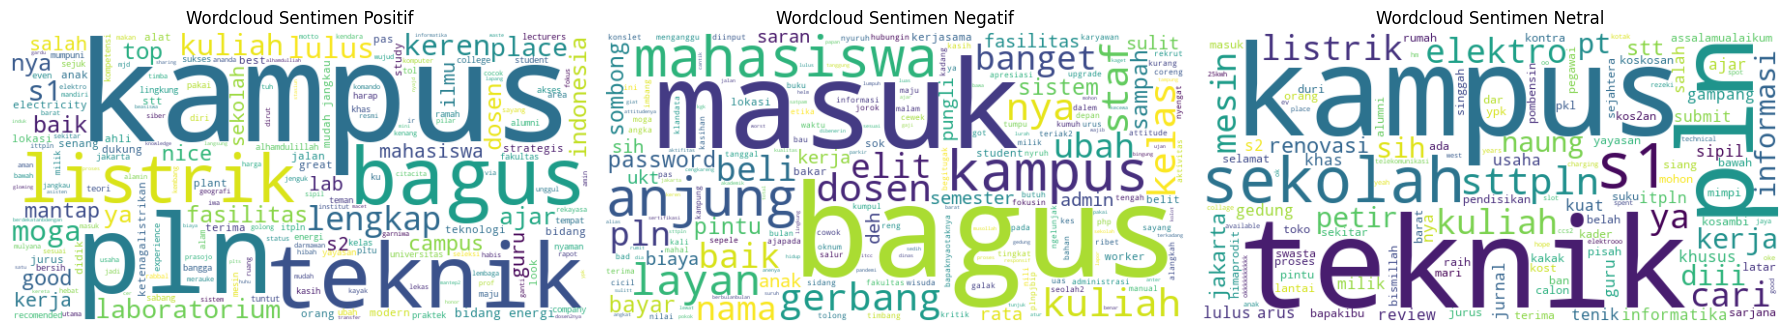

In [66]:
# Visualisasi Wordcloud untuk masing-masing sentimen pada kolom tokens
sentiments = ['positif', 'negatif', 'netral']
plt.figure(figsize=(18, 5))

for i, sentiment in enumerate(sentiments):
    # Gabungkan semua token menjadi satu string untuk sentimen tertentu
    tokens_sentiment = df[df['label_sentimen'] == sentiment]['tokens'].dropna()
    text_sentiment = " ".join([token for tokens in tokens_sentiment for token in tokens])
    wordcloud = WordCloud(width=600, height=300, background_color='white').generate(text_sentiment)
    plt.subplot(1, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud Sentimen {sentiment.capitalize()}')

plt.tight_layout()
plt.show()

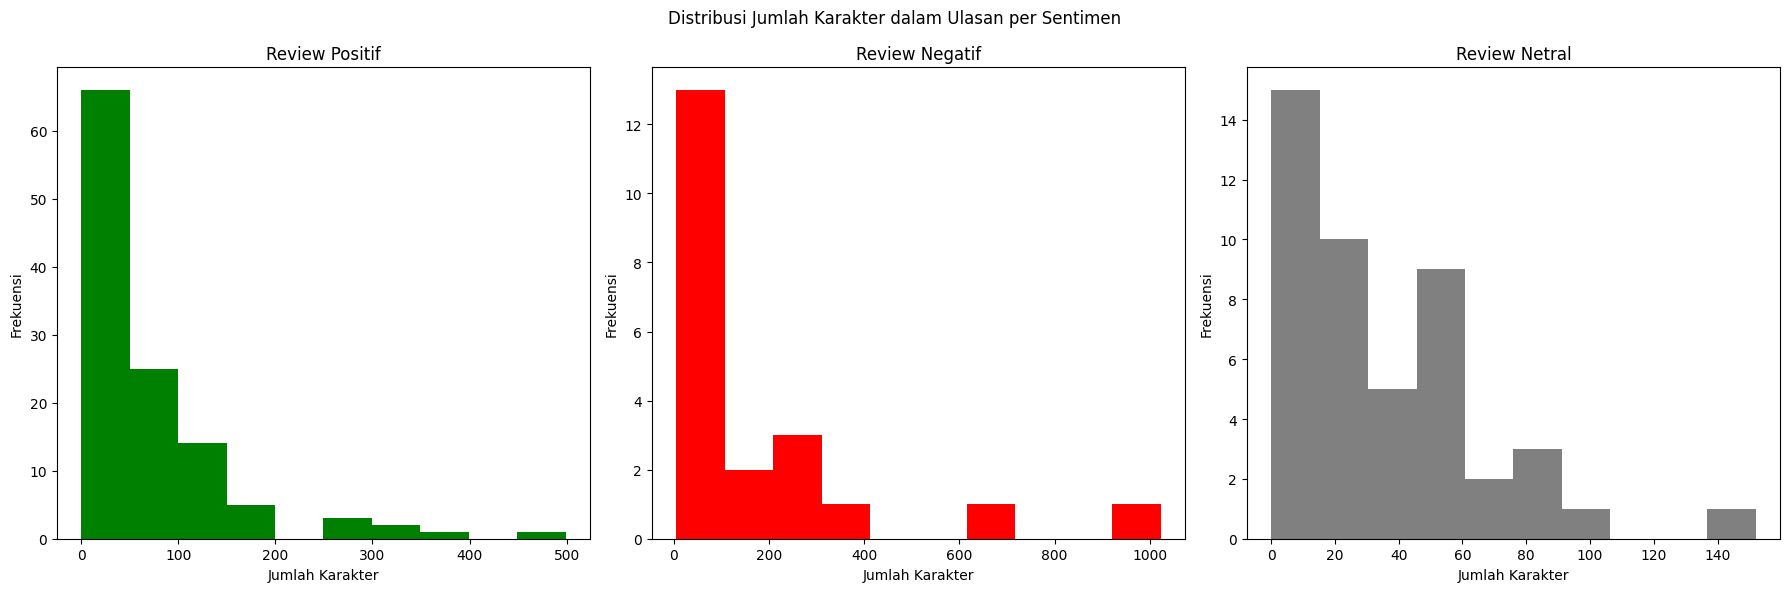

In [67]:
figure, axes = plt.subplots(1, 3, figsize=(18, 6))
sentiments = ['positif', 'negatif', 'netral']
colors = ['green', 'red', 'gray']

for i, sentiment in enumerate(sentiments):
    review_lengths = df[df['label_sentimen'] == sentiment]['snippet'].str.len()
    axes[i].hist(review_lengths, color=colors[i])
    axes[i].set_title(f'Review {sentiment.capitalize()}')
    axes[i].set_xlabel('Jumlah Karakter')
    axes[i].set_ylabel('Frekuensi')

figure.suptitle('Distribusi Jumlah Karakter dalam Ulasan per Sentimen')
plt.tight_layout()
plt.show()


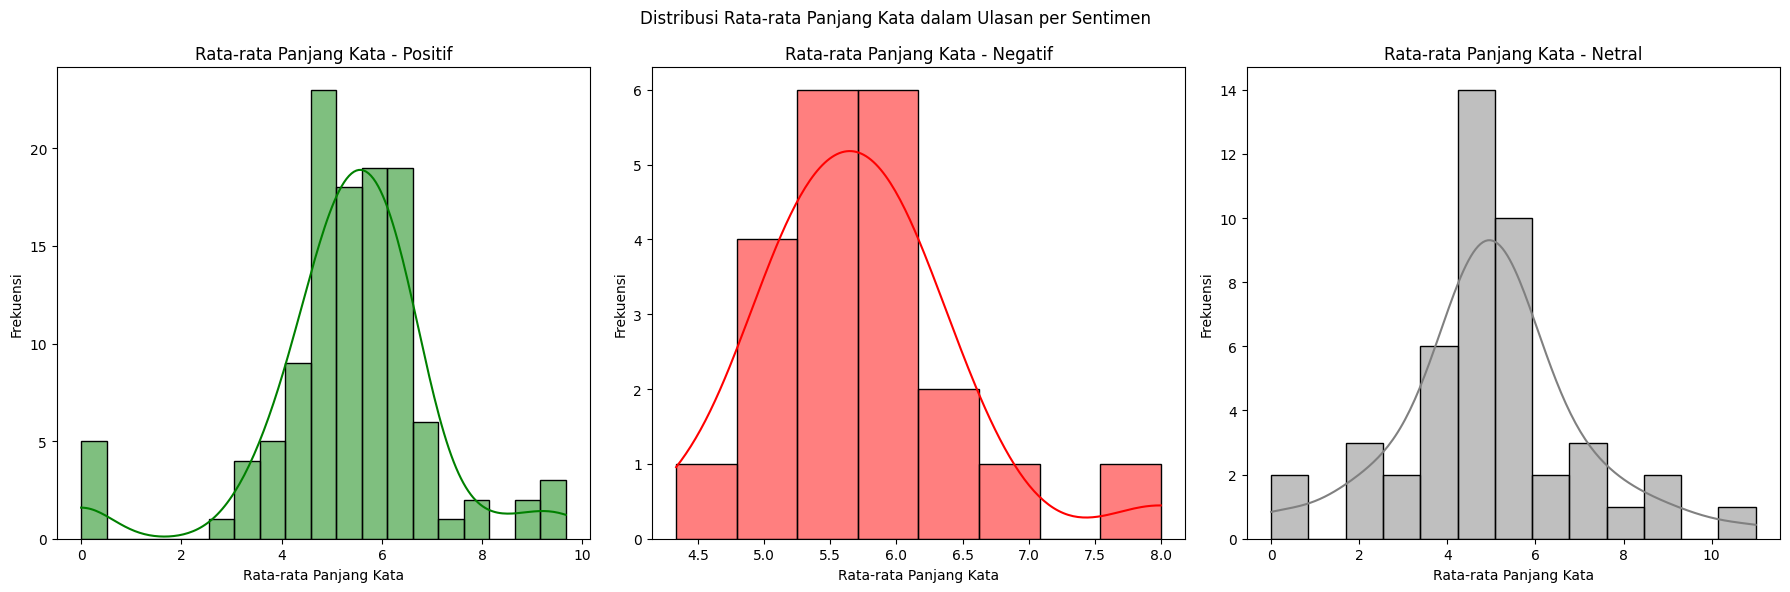

In [68]:
figure, axes = plt.subplots(1, 3, figsize=(18, 6))
sentiments = ['positif', 'negatif', 'netral']
colors = ['green', 'red', 'gray']

for i, sentiment in enumerate(sentiments):
    # Ambil token untuk setiap sentimen
    tokens = df[df['label_sentimen'] == sentiment]['tokens']
    # Hitung rata-rata panjang kata per ulasan
    avg_word_length = tokens.apply(lambda x: np.mean([len(word) for word in x]) if x else 0)
    sns.histplot(avg_word_length, ax=axes[i], color=colors[i], kde=True)
    axes[i].set_title(f'Rata-rata Panjang Kata - {sentiment.capitalize()}')
    axes[i].set_xlabel('Rata-rata Panjang Kata')
    axes[i].set_ylabel('Frekuensi')

figure.suptitle('Distribusi Rata-rata Panjang Kata dalam Ulasan per Sentimen')
plt.tight_layout()
plt.show()


In [69]:
from collections import Counter
import plotly.express as px

def get_top_token_ngrams(token_series, n=20, ngram=1):
    ngram_list = []
    for tokens in token_series.dropna():
        ngram_list.extend([' '.join(tokens[i:i+ngram]) for i in range(len(tokens)-ngram+1)])
    return Counter(ngram_list).most_common(n)

# Visualisasi untuk sentimen positif
tokens_positif = df[df['label_sentimen'] == 'positif']['tokens']
most_common_uni_positif = get_top_token_ngrams(tokens_positif, 20, 1)
most_common_uni_positif = dict(most_common_uni_positif)

temp_positif = pd.DataFrame({
    "Common_words": list(most_common_uni_positif.keys()),
    "Count": list(most_common_uni_positif.values())
})

fig_positif = px.bar(
    temp_positif, x="Count", y="Common_words",
    title="Common Words in Positif Reviews (Tokens)",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_positif.show()

# Visualisasi untuk sentimen negatif
tokens_negatif = df[df['label_sentimen'] == 'negatif']['tokens']
most_common_uni_negatif = get_top_token_ngrams(tokens_negatif, 20, 1)
most_common_uni_negatif = dict(most_common_uni_negatif)

temp_negatif = pd.DataFrame({
    "Common_words": list(most_common_uni_negatif.keys()),
    "Count": list(most_common_uni_negatif.values())
})

fig_negatif = px.bar(
    temp_negatif, x="Count", y="Common_words",
    title="Common Words in Negatif Reviews (Tokens)",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_negatif.show()

# Visualisasi untuk sentimen netral
tokens_netral = df[df['label_sentimen'] == 'netral']['tokens']
most_common_uni_netral = get_top_token_ngrams(tokens_netral, 20, 1)
most_common_uni_netral = dict(most_common_uni_netral)

temp_netral = pd.DataFrame({
    "Common_words": list(most_common_uni_netral.keys()),
    "Count": list(most_common_uni_netral.values())
})

fig_netral = px.bar(
    temp_netral, x="Count", y="Common_words",
    title="Common Words in Netral Reviews (Tokens)",
    orientation='h', width=700, height=700, color="Common_words"
)
fig_netral.show()


# **⚠️ Warning:**  
Disitribusi kelas tidak seimbang (imbalance data) pada kelas positif, negatif, dan netral sehingga perlu dilakukan balancing data. (bisa pake teknik oversampling, undersampling, atau SMOTE)

In [ ]:
df['label_sentimen'].value_counts()

label_sentimen
positif    117
netral      46
negatif     21
Name: count, dtype: int64